In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# To get the output of plotted command inline
%matplotlib inline
lr = LinearRegression()

In [2]:
# Loading the dataset using pickle
data = pickle.load(open("data/train.pkl", "rb"))
test_data = pickle.load(open("data/test.pkl", "rb"))
# Splitting the testing dataset columnwise
x_test,y_test = np.split(test_data,2,axis=1)

In [3]:
# Splitting the training dataset randomly in 10 parts
np.random.shuffle(data)
train = np.split(data,10)

Degree:
1


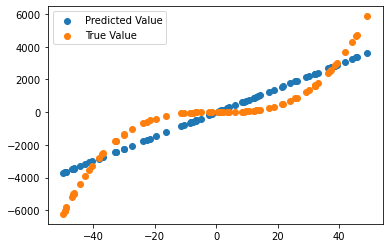

Degree:
2


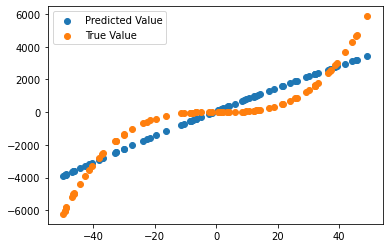

Degree:
3


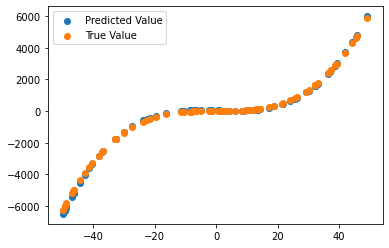

Degree:
4


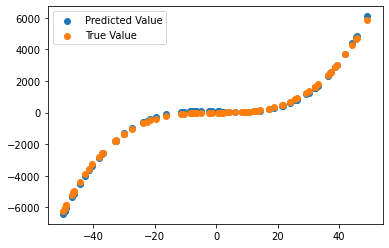

Degree:
5


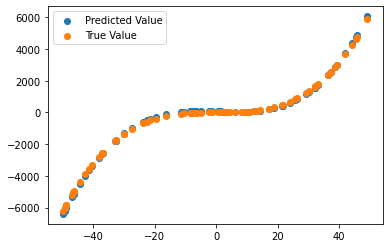

Degree:
6


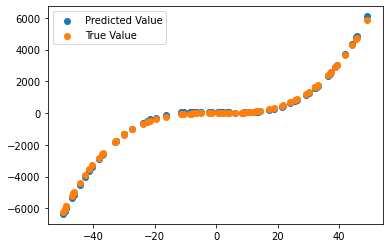

Degree:
7


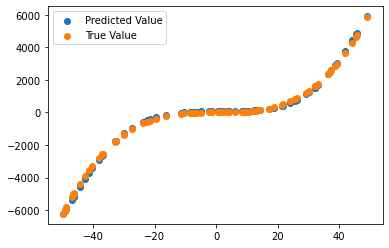

Degree:
8


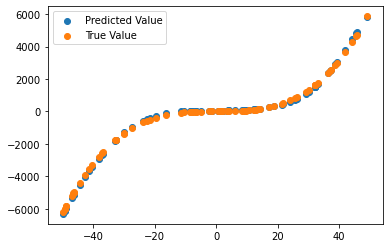

Degree:
9


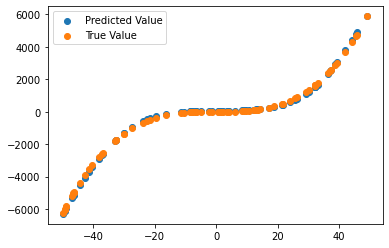

Degree:
10


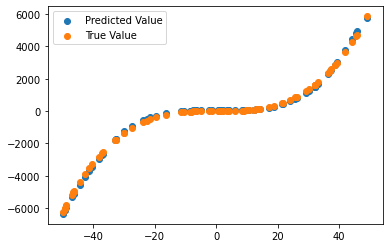

Degree:
11


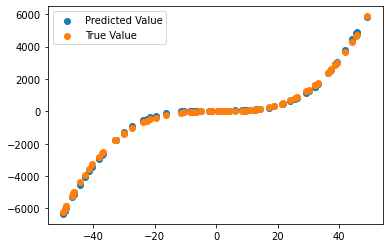

Degree:
12


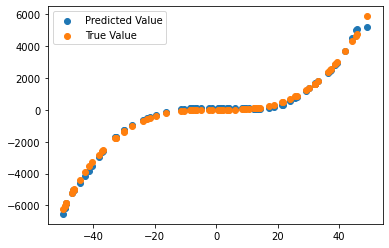

Degree:
13


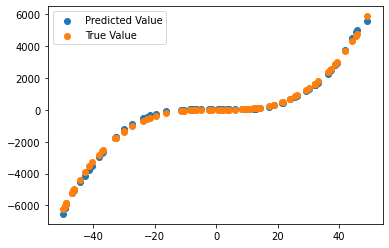

Degree:
14


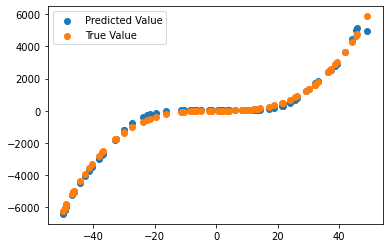

Degree:
15


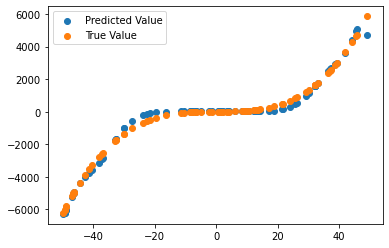

Degree:
16


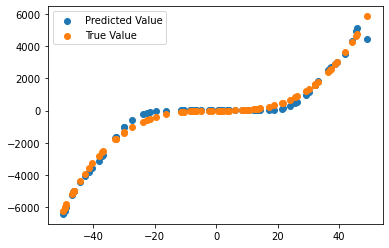

Degree:
17


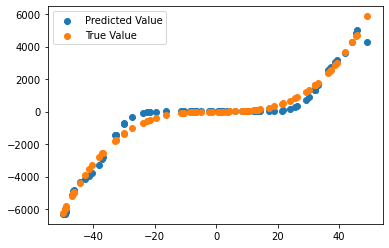

Degree:
18


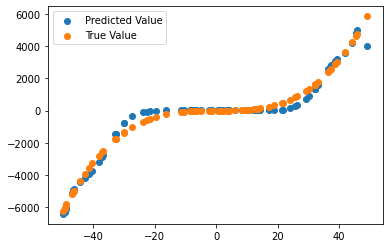

Degree:
19


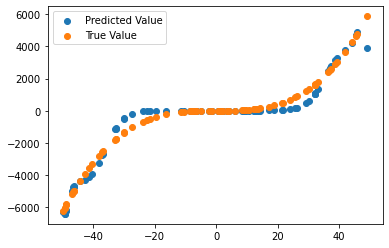

Degree:
20


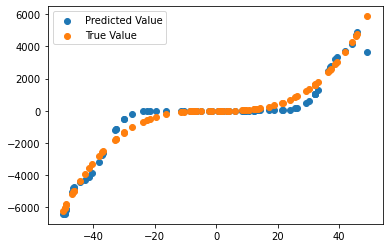

             variance        bias       irr_err     total_err
Degree                                                       
1        26724.179082  820.228845 -1.053650e-10  1.030787e+06
2        60428.393751  810.530060  4.638423e-11  1.017385e+06
3        76775.154391   67.929330 -5.366019e-12  8.555873e+04
4        92460.552323   74.659798  7.639755e-12  1.004376e+05
5       131176.584199   76.991013 -3.274181e-12  1.395945e+05
6       146850.069456   72.789141 -1.218723e-11  1.542938e+05
7       164084.224803   79.788973  2.164597e-11  1.725181e+05
8       184954.245291   82.090933 -1.582521e-11  1.939199e+05
9       196923.757939   78.291390 -1.109584e-11  2.048641e+05
10      187474.985506   84.400848  5.184120e-12  1.969422e+05
11      215046.279358   76.021089  9.549694e-12  2.229685e+05
12      211462.448348  104.648186  4.001777e-12  2.316205e+05
13      219104.638938   80.922508 -1.355147e-11  2.305692e+05
14      221004.414399  111.150452 -1.600711e-11  2.501795e+05
15      

In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Dictionary used to plot graphs
graph_data = { 'degree': [], 'bias_sq': [], 'variance': [], 'irr_err': [], 'total_err': []}
# Dictionary used to tabulate calculated results
table_data = { 'variance':[], 'bias':[], 'irr_err':[], 'total_err': []}
k = 0

# Going from degree 1 to 20
for degree in range(1,21):
    print('Degree:')
    print(degree)
    # Initializing the predictions matrix with all zero values
    predictions = np.zeros((80,1))
    # Generating matrix consisting of all polynomial combinations 
    # of the features with degree less than or equal to the given degree
    trans = PolynomialFeatures(degree=degree)
    i = 1
    # Looping over 10 training datasets
    for t in train:
        # Splitting up the training set in x and y values
        x,y = np.split(t,2,axis=1)
        # fits to the data and then transforms it
        x_poly = trans.fit_transform(x)
        x_test_poly = trans.fit_transform(x_test)
        # Training the model on a training set
        model = lr.fit(x_poly,y)
        # Finding the predictions for the test set on the trained model
        arr = model.predict(x_test_poly)
        # For the first iteration, setting predictions matrix as arr
        # For furthur iterations appending the obtained 
        # predictions containing arr column to the predictions matrix
        if i==1:
            predictions = predictions+arr
            i=0
        else:
            predictions = np.append(predictions, arr, axis=1)
    
    # Calculating mean value of all predictions for a value of x in testing data
    e_fcap = np.mean(predictions,axis=1)
    
    # After resizing e_fcap is a column matrix containing
    # mean of predicted values for each x in testing dataset
    e_fcap.resize((80,1))
    
    # For each degree, plotting mean of predictions and true values
    # for each x in testing set
    plt.figure()
    plt.scatter(x_test, e_fcap, label='Predicted Value')
    plt.scatter(x_test,y_test, label='True Value')
    plt.legend()
    plt.show()
    k = k + 1
    
    # Calculating bias for each x in testing set
    bias=e_fcap - y_test

    # Square mean of bias values
    bias_sq = np.mean((bias**2))

    # Resultant Bias value for each degree 
    fin_bias = np.mean(np.abs(bias))
    # Storing bias for tabulating
    table_data['bias'].append(fin_bias)

    # Calculating variance for each x in testing set
    temp = (predictions - e_fcap)
    variance = np.mean((temp**2),axis=1)
    variance.resize((80,1))

    # Resultant Variance value for each degree 
    fin_variance = np.mean(variance)
    # Storing variance for tabulating
    table_data['variance'].append(fin_variance)

    # Calculating irreducible error for each x in testing set
    temp2 = (y_test - predictions)
    t = np.mean((temp2**2), axis=1)
    t.resize((80,1))
    err = t - ( bias**2 + variance)
    
    # Resultant Irreducible error value for each degree
    err_fin = np.mean(err)

    # Storing irreducible error for tabulating
    table_data['irr_err'].append(err_fin)
    # Storing total error for tabulating
    table_data['total_err'].append(bias_sq + fin_variance + err_fin)

    # Storing the computed data to plot graphs
    graph_data['total_err'].append(bias_sq + fin_variance + err_fin)
    graph_data['degree'].append(degree)
    graph_data['bias_sq'].append(bias_sq)
    graph_data['variance'].append(fin_variance)
    graph_data['irr_err'].append(err_fin) 


# Tabulating the computed data
df = pd.DataFrame(data=table_data, index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
df.index.name = 'Degree'

print(df)



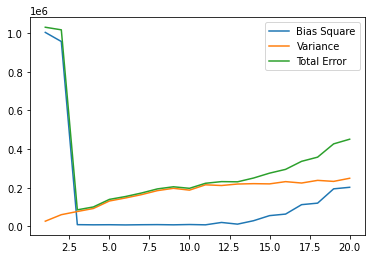

In [5]:
# Plotting Graph for Bias square and Variance
plt.plot(graph_data['degree'], graph_data['bias_sq'], label='Bias Square')
plt.plot(graph_data['degree'], graph_data['variance'], label='Variance')
plt.plot(graph_data['degree'], graph_data['total_err'], label='Total Error')

plt.legend()
plt.savefig('Tradeoff.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c78c802e-5c62-4742-ba98-f5c74a40e892' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>